In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#First, we read the data

data_rates=pd.read_csv("/Users/jsjaramillod/Desktop/IMA_bootcamp/Project/MacroData/yield-curve-rates-2004-2024.csv")

#copy
rates_df=data_rates.copy()

In [10]:
#Second we modify the format, this is the solution that I found for the two digit year
def chain_date(date_str):
    for fmt in ('%m/%d/%Y', '%m/%d/%y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass
    return pd.NaT

# We apply the chain_date function
rates_df['Date'] = rates_df['Date'].apply(chain_date)


copy_df=rates_df.copy()

In [11]:
# Assign quarter
def assign_quarter(date):
    month = date.month
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

# Asisign the quarters in a new column
copy_df['Quarter'] = copy_df['Date'].apply(assign_quarter)
copy_df['Year'] = copy_df['Date'].dt.year


# Group by guarter and year
quarterly_averages = copy_df.groupby(['Year', 'Quarter']).mean(numeric_only=True).reset_index()

#2 Mo and 4 Mo are almost null, we remove them to reduce the amount of variables
quarterly_averages=quarterly_averages.drop(columns=['2 Mo', '4 Mo'])

quarterly_averages.head()

,Year,Quarter,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2004,Q1,0.909677,0.933710,1.003548,1.221452,1.686613,2.163065,2.980968,3.501452,4.010000,4.877903,NaN
1,2004,Q2,0.954516,1.096129,1.359677,1.775484,2.454677,2.971935,3.720968,4.183871,4.597097,5.355645,NaN
2,2004,Q3,1.370000,1.513906,1.788437,2.075000,2.556563,2.919531,3.505625,3.922188,4.301406,5.068281,NaN
3,2004,Q4,1.841774,2.047419,2.297581,2.472742,2.822419,3.058871,3.493710,3.855000,4.175806,4.874839,NaN
4,2005,Q1,2.360984,2.589180,2.876885,3.072459,3.454918,3.623934,3.890820,4.098852,4.303607,4.764098,NaN


In [12]:
import itertools

#calculate the spreads for all the possible spreads (around 78 possible)
columns_to_consider = quarterly_averages.columns[2:]


column_pairs = list(itertools.combinations(columns_to_consider, 2))


#new data frame to store the spreads
spreads_df = pd.DataFrame()

for (col1, col2) in column_pairs:
    spread_col_name = f"{col2}-{col1}_spread"
    spreads_df[spread_col_name] = quarterly_averages[col2] - quarterly_averages[col1]
    
    
#Add the year-Quarter columns must have 80 columns in total
result_df = pd.concat([quarterly_averages.iloc[:, :2], spreads_df], axis=1)

result_df.head()

,Year,Quarter,3 Mo-1 Mo_spread,6 Mo-1 Mo_spread,1 Yr-1 Mo_spread,2 Yr-1 Mo_spread,3 Yr-1 Mo_spread,5 Yr-1 Mo_spread,7 Yr-1 Mo_spread,10 Yr-1 Mo_spread,...,7 Yr-5 Yr_spread,10 Yr-5 Yr_spread,20 Yr-5 Yr_spread,30 Yr-5 Yr_spread,10 Yr-7 Yr_spread,20 Yr-7 Yr_spread,30 Yr-7 Yr_spread,20 Yr-10 Yr_spread,30 Yr-10 Yr_spread,30 Yr-20 Yr_spread
0,2004,Q1,0.024032,0.093871,0.311774,0.776935,1.253387,2.071290,2.591774,3.100323,...,0.520484,1.029032,1.896935,NaN,0.508548,1.376452,NaN,0.867903,NaN,NaN
1,2004,Q2,0.141613,0.405161,0.820968,1.500161,2.017419,2.766452,3.229355,3.642581,...,0.462903,0.876129,1.634677,NaN,0.413226,1.171774,NaN,0.758548,NaN,NaN
2,2004,Q3,0.143906,0.418437,0.705000,1.186562,1.549531,2.135625,2.552188,2.931406,...,0.416562,0.795781,1.562656,NaN,0.379219,1.146094,NaN,0.766875,NaN,NaN
3,2004,Q4,0.205645,0.455806,0.630968,0.980645,1.217097,1.651935,2.013226,2.334032,...,0.361290,0.682097,1.381129,NaN,0.320806,1.019839,NaN,0.699032,NaN,NaN
4,2005,Q1,0.228197,0.515902,0.711475,1.093934,1.262951,1.529836,1.737869,1.942623,...,0.208033,0.412787,0.873279,NaN,0.204754,0.665246,NaN,0.460492,NaN,NaN


In [13]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

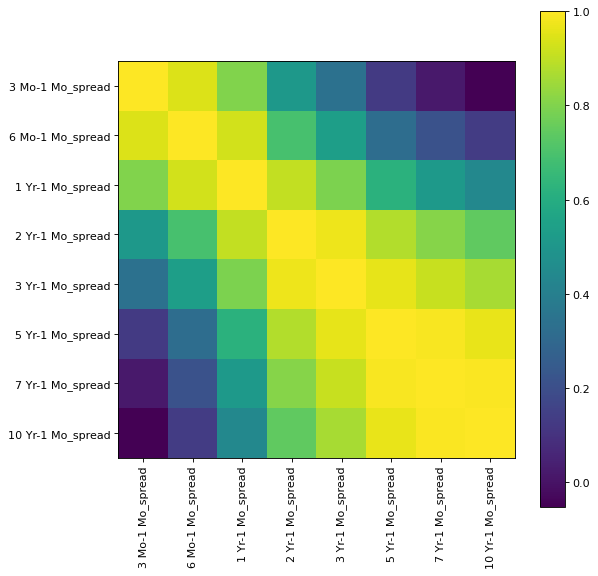

In [14]:
columns_to_consider = result_df.columns[2:10]

columns_to_include = [col for col in columns_to_consider]

df_selected = result_df[columns_to_include]

plotCorrelationMatrix(df_selected, 8)

In [15]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    # keep only numerical columns
    df = df.select_dtypes(include =[np.number]) 
    columnNames = list(df)
    df = df[columnNames]
    #Create the frames
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [16]:
plotScatterMatrix(df_selected, 24, 8)


NameError: name 'np' is not defined